#Importación de las librerias a utilizar

In [ ]:
from google.colab import drive
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import NearMiss
from sklearn.model_selection import GridSearchCV
from collections import Counter
from sklearn.metrics import accuracy_score, balanced_accuracy_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
import warnings

#Montaje del Dataset

In [ ]:
drive.mount('/content/drive')
data = pd.read_csv("drive/MyDrive/Colab Notebooks/data/Datos_IRA.csv")

Mounted at /content/drive


In [ ]:
data

,Bp,Sg,Al,Su,Rbc,Bu,Sc,Sod,Pot,Hemo,Wbcc,Rbcc,Htn,Class
0,80.0,1.020,1.0,0.0,1.0,36.0,1.2,137.53,4.63,15.4,7800.0,5.20,1.0,1
1,50.0,1.020,4.0,0.0,1.0,18.0,0.8,137.53,4.63,11.3,6000.0,4.71,0.0,1
2,80.0,1.010,2.0,3.0,1.0,53.0,1.8,137.53,4.63,9.6,7500.0,4.71,0.0,1
3,70.0,1.005,4.0,0.0,1.0,56.0,3.8,111.00,2.50,11.2,6700.0,3.90,1.0,1
4,80.0,1.010,2.0,0.0,1.0,26.0,1.4,137.53,4.63,11.6,7300.0,4.60,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,80.0,1.020,0.0,0.0,1.0,49.0,0.5,150.00,4.90,15.7,6700.0,4.90,0.0,0
396,70.0,1.025,0.0,0.0,1.0,31.0,1.2,141.00,3.50,16.5,7800.0,6.20,0.0,0
397,80.0,1.020,0.0,0.0,1.0,26.0,0.6,137.00,4.40,15.8,6600.0,5.40,0.0,0
398,60.0,1.025,0.0,0.0,1.0,50.0,1.0,135.00,4.90,14.2,7200.0,5.90,0.0,0


#Ver la matríz de correlación

In [ ]:
Correlacion= data.corr()
print(Correlacion)

             Bp        Sg        Al        Su       Rbc        Bu        Sc  \
Bp     1.000000 -0.164057  0.146060  0.190277 -0.151478  0.184173  0.144469   
Sg    -0.164057  1.000000 -0.460835 -0.292053  0.253894 -0.249263 -0.176141   
Al     0.146060 -0.460835  1.000000  0.262564 -0.374484  0.405035  0.229396   
Su     0.190277 -0.292053  0.262564  1.000000 -0.092940  0.126074  0.094568   
Rbc   -0.151478  0.253894 -0.374484 -0.092940  1.000000 -0.236270 -0.138391   
Bu     0.184173 -0.249263  0.405035  0.126074 -0.236270  1.000000  0.581176   
Sc     0.144469 -0.176141  0.229396  0.094568 -0.138391  0.581176  1.000000   
Sod   -0.103383  0.217456 -0.270709 -0.053448  0.140568 -0.307357 -0.624493   
Pot    0.066791 -0.063450  0.114484  0.180098  0.018164  0.336954  0.205361   
Hemo  -0.279441  0.492103 -0.548681 -0.156875  0.280991 -0.540699 -0.342053   
Wbcc   0.025963 -0.206880  0.200664  0.159033 -0.002205  0.041530 -0.005420   
Rbcc  -0.220827  0.443437 -0.454131 -0.163825  0.202

#Limpieza de datos

para ver los valores atipicos se realiza el diagrama de cajas y bigotes

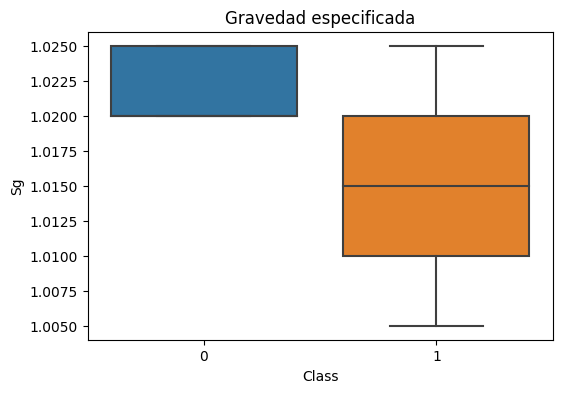

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(x = 'Class', y = 'Sg', data = data)
plt.title('Gravedad especificada')
plt.show()

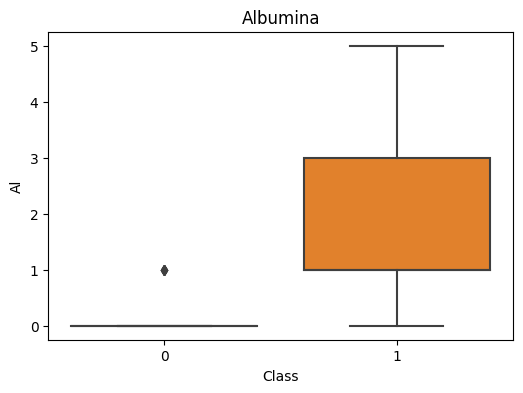

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(x = 'Class', y = 'Al', data = data)
plt.title('Albumina')
plt.show()

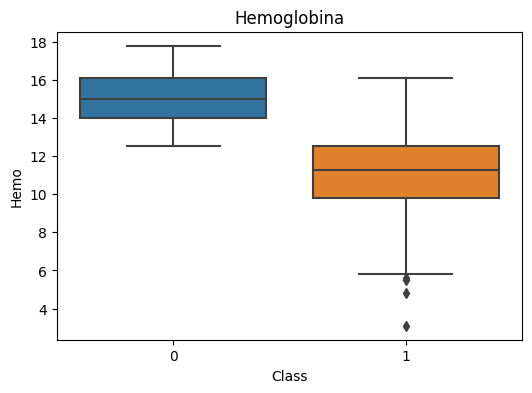

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(x = 'Class', y = 'Hemo', data = data)
plt.title('Hemoglobina')
plt.show()

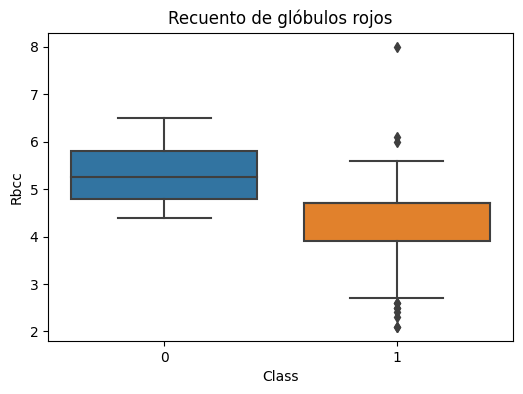

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(x = 'Class', y = 'Rbcc', data = data)
plt.title('Recuento de glóbulos rojos')
plt.show()

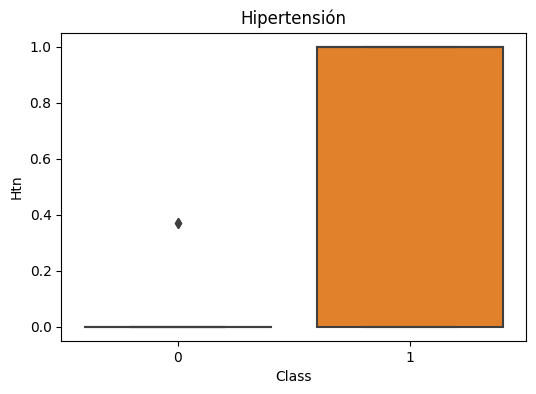

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(x = 'Class', y = 'Htn', data = data)
plt.title('Hipertensión')
plt.show()

In [ ]:
#cuartiles
q_Sg=statistics.quantiles(data['Sg'], n=4)
print('Los cuartiles en orden para variable Sg son: ', q_Sg)

q_Al=statistics.quantiles(data['Al'], n=4)
print('Los cuartiles en orden para variable Al son: ', q_Al)

q_Hemo=statistics.quantiles(data['Hemo'], n=4)
print('Los cuartiles en orden para variable Hemo son: ', q_Hemo)

q_Rbcc=statistics.quantiles(data['Rbcc'], n=4)
print('Los cuartiles en orden para variable Rbcc son: ', q_Rbcc)

q_Htn=statistics.quantiles(data['Htn'], n=4)
print('Los cuartiles en orden para variable Htn son: ', q_Htn)

Los cuartiles en orden para variable Sg son:  [1.015, 1.02, 1.02]
Los cuartiles en orden para variable Al son:  [0.0, 1.0, 2.0]
Los cuartiles en orden para variable Hemo son:  [10.825000000000001, 12.53, 14.674999999999999]
Los cuartiles en orden para variable Rbcc son:  [4.5, 4.71, 5.1]
Los cuartiles en orden para variable Htn son:  [0.0, 0.0, 1.0]


In [ ]:
iqrSg=q_Sg[2]-q_Sg[0]
iqrAl=q_Al[2]-q_Al[0]
iqrHemo=q_Hemo[2]-q_Hemo[0]
iqrRbcc=q_Rbcc[2]-q_Rbcc[0]
iqrHtn=q_Htn[2]-q_Htn[0]

print('iqrSg = ', iqrSg)
print('iqrAl = ', iqrAl)
print('iqrHemo = ', iqrHemo)
print('iqrRbcc = ', iqrRbcc)
print('iqrHtn = ', iqrHtn)

iqrSg =  0.0050000000000001155
iqrAl =  2.0
iqrHemo =  3.849999999999998
iqrRbcc =  0.5999999999999996
iqrHtn =  1.0


In [ ]:
k=1.5

LimInf_Sg=q_Sg[0]-k*iqrSg
LimSup_Sg=q_Sg[2]+k*iqrSg

LimInf_Al=q_Al[0]-k*iqrAl
LimSup_Al=q_Al[2]+k*iqrAl

LimInf_Hemo=q_Hemo[0]-k*iqrHemo
LimSup_Hemo=q_Hemo[2]+k*iqrHemo

LimInf_Rbcc=q_Rbcc[0]-k*iqrRbcc
LimSup_Rbcc=q_Rbcc[2]+k*iqrRbcc

LimInf_Htn=q_Htn[0]-k*iqrHtn
LimSup_Htn=q_Htn[2]+k*iqrHtn

print('Límite Superior Sg: ' , LimSup_Sg, 'Límite Inferior Sg: ', LimInf_Sg)
print('Límite Superior Al: ' , LimSup_Al, 'Límite Inferior Al: ', LimInf_Al)
print('Límite Superior Hemo: ' , LimSup_Hemo, 'Límite Inferior Hemo: ', LimInf_Hemo)
print('Límite Superior Rbcc: ' , LimSup_Rbcc, 'Límite Inferior Rbcc: ', LimInf_Rbcc)
print('Límite Superior Htn: ' , LimSup_Htn, 'Límite Inferior Htn: ', LimInf_Htn)

Límite Superior Sg:  1.0275000000000003 Límite Inferior Sg:  1.0074999999999998
Límite Superior Al:  5.0 Límite Inferior Al:  -3.0
Límite Superior Hemo:  20.449999999999996 Límite Inferior Hemo:  5.050000000000004
Límite Superior Rbcc:  5.999999999999999 Límite Inferior Rbcc:  3.6000000000000005
Límite Superior Htn:  2.5 Límite Inferior Htn:  -1.5


In [ ]:
#se reempalzan los avalores atípicos por los límites superior e inferioir calculados:
x=0
contSg=0
contAl=0
contHemo=0
contRbcc=0
contHtn=0

for x in range (400):
    datoSg=data['Sg'][x]
    if(datoSg>LimSup_Sg):
        data['Sg'][x]=LimSup_Sg
        contSg=contSg+1
    elif(datoSg<LimInf_Sg):
        data['Sg'][x]=LimInf_Sg
        contSg=contSg+1

    datoAl=data['Al'][x]
    if(datoAl>LimSup_Al):
        data['Al'][x]=LimSup_Al
        contAl=contAl+1
    elif(datoAl<LimInf_Al):
        data['Al'][x]=LimInf_Al
        contAl=contAl+1

    datoHemo=data['Hemo'][x]
    if(datoHemo>LimSup_Hemo):
        data['Hemo'][x]=LimSup_Hemo
        contHemo=contHemo+1
    elif(datoHemo<LimInf_Hemo):
        data['Hemo'][x]=LimInf_Hemo
        contHemo=contHemo+1

    datoRbcc=data['Rbcc'][x]
    if(datoRbcc>LimSup_Rbcc):
        data['Rbcc'][x]=LimSup_Rbcc
        contRbcc=contRbcc+1
    elif(datoRbcc<LimInf_Rbcc):
        data['Rbcc'][x]=LimInf_Rbcc
        contRbcc=contRbcc+1

    datoHtn=data['Htn'][x]
    if(datoHtn>LimSup_Htn):
        data['Htn'][x]=LimSup_Htn
        contHtn=contHtn+1
    elif(datoHtn<LimInf_Htn):
        data['Htn'][x]=LimInf_Htn
        contHtn=contHtn+1


<ipython-input-121-d13171e200ef>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Sg'][x]=LimInf_Sg
<ipython-input-121-d13171e200ef>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Rbcc'][x]=LimInf_Rbcc
<ipython-input-121-d13171e200ef>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Rbcc'][x]=LimSup_Rbcc
<ipython-input-121-d13171e200ef>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

In [ ]:
print("Cantidad de datos modificados: ")
print('Para Sg: ', contSg)
print('Para Al: ', contAl)
print('Para Hemo: ', contHemo)
print('Para Rbcc: ', contRbcc)
print('Para Htn: ', contHtn)

Cantidad de datos modificados: 
Para Sg:  7
Para Al:  0
Para Hemo:  2
Para Rbcc:  75
Para Htn:  0


#Se realiza la separación del dataset en x (variables que se utilizarán para predecir) y en y (variable que indica la presencia o no presencia de la enfermedad)

In [ ]:
x=data[["Sg",	"Al",	"Hemo",	"Rbcc",	"Htn"]] #Filtrado del dataset en x
y=data['Class'] #Filtrado del Dataset en y
conteo=Counter(y) #Contar cuantos datos pertenecen a cada categoria
print(conteo) #Mostrar ese conteo

Counter({1: 250, 0: 150})


#Dividir el conjunto de datos para entrenamiento y testeo

***Para una división de 70% (Entrenamiento) y 30% (Prueba)***

In [ ]:
x_train_30, x_test_30, y_train_30, y_test_30 = train_test_split(x, y, test_size=0.3, stratify=y, random_state=42)

*Balanceo de Variables*

In [ ]:
xr_train_30, xr_test_30, yr_train_30, yr_test_30 = train_test_split(x, y, test_size=0.3, stratify=y, random_state=42)
print("Distibución antes {}".format(Counter(xr_train_30)))
print("Distibución antes {}".format(Counter(xr_test_30)))
print("Distibución antes {}".format(Counter(yr_train_30)))
print("Distibución antes {}".format(Counter(yr_test_30)))

Distibución antes Counter({'Sg': 1, 'Al': 1, 'Hemo': 1, 'Rbcc': 1, 'Htn': 1})
Distibución antes Counter({'Sg': 1, 'Al': 1, 'Hemo': 1, 'Rbcc': 1, 'Htn': 1})
Distibución antes Counter({1: 175, 0: 105})
Distibución antes Counter({1: 75, 0: 45})


In [ ]:
ns=NearMiss(sampling_strategy='auto',n_neighbors=3,version=2)
xr_train_30,yr_train_30=ns.fit_resample(xr_train_30, yr_train_30)
xr_test_30, yr_test_30=ns.fit_resample(xr_test_30, yr_test_30)

print("Distibución despues {}".format(Counter(xr_train_30)))
print("Distibución despues {}".format(Counter(xr_test_30)))
print("Distibución despues {}".format(Counter(yr_train_30)))
print("Distibución despues {}".format(Counter(yr_test_30)))

Distibución despues Counter({'Sg': 1, 'Al': 1, 'Hemo': 1, 'Rbcc': 1, 'Htn': 1})
Distibución despues Counter({'Sg': 1, 'Al': 1, 'Hemo': 1, 'Rbcc': 1, 'Htn': 1})
Distibución despues Counter({0: 105, 1: 105})
Distibución despues Counter({0: 45, 1: 45})


#Se crea un clasificador base

AdaBoostClassifier es un algoritmo de aprendizaje automático que pertenece a la familia de métodos de ensamble. Su objetivo principal es mejorar la precisión de los modelos de aprendizaje débil (también conocidos como "weak learners" o "aprendices débiles") al combinarlos para formar un modelo fuerte.

En este caso se utilizará el clasificador DecisionTreeClassifier

In [ ]:
clasificador_base = DecisionTreeClassifier(max_depth=1)

#Se crea el modelo

n_estimators: Número de clasificadores débiles (o estimadores) que se van a entrenar. Cuantos más estimadores, más complejo puede volverse el modelo. Sin embargo, un número demasiado grande puede llevar al sobreajuste.

In [ ]:
adaboost_classifier = AdaBoostClassifier(clasificador_base, n_estimators=50, random_state=42)

***Para las variables balanceadas***

In [ ]:
adaboost_classifier_r = AdaBoostClassifier(clasificador_base, n_estimators=50, random_state=42)

#Entrenamiento del Modelo

In [ ]:
adaboost_classifier.fit(x_train_30, y_train_30)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   random_state=42)

***Para las variables balanceadas***

In [ ]:
adaboost_classifier_r.fit(xr_train_30, yr_train_30)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   random_state=42)

#Se realizan las predicciones de prueba

In [ ]:
y_pred_30 = adaboost_classifier.predict(x_test_30)

***Para las variables balanceadas***

In [ ]:
y_pred_30_r = adaboost_classifier_r.predict(xr_test_30)

#Se evalua el modelo

In [ ]:
# Calcular métricas
accuracy_1 = accuracy_score(y_test_30, y_pred_30)
balanced_accuracy_1 = balanced_accuracy_score(y_test_30, y_pred_30)
recall_1 = recall_score(y_test_30, y_pred_30)
f1_1 = f1_score(y_test_30, y_pred_30)

# Imprimir los resultados
print(f'Accuracy: {accuracy_1}')
print(f'Balanced Accuracy: {balanced_accuracy_1}')
print(f'Recall: {recall_1}')
print(f'F1-Score: {f1_1}')

Accuracy: 0.9833333333333333
Balanced Accuracy: 0.9866666666666667
Recall: 0.9733333333333334
F1-Score: 0.9864864864864865


***Para las variables balanceadas***

In [ ]:
# Calcular métricas
accuracy_1_r = accuracy_score(yr_test_30, y_pred_30_r)
balanced_accuracy_1_r = balanced_accuracy_score(yr_test_30, y_pred_30_r)
recall_1_r = recall_score(yr_test_30, y_pred_30_r)
f1_1_r = f1_score(yr_test_30, y_pred_30_r)

# Imprimir los resultados
print(f'Accuracy: {accuracy_1_r}')
print(f'Balanced Accuracy: {balanced_accuracy_1_r}')
print(f'Recall: {recall_1_r}')
print(f'F1-Score: {f1_1_r}')

Accuracy: 0.9777777777777777
Balanced Accuracy: 0.9777777777777779
Recall: 0.9555555555555556
F1-Score: 0.9772727272727273


#Tratar de mejorar el rendimiento:

*Creación del modelo a mejorar*

In [ ]:
adaboost_classifier_2 = AdaBoostClassifier(clasificador_base, random_state=42)

*Definir los hiperparametros a buscar*

learning_rate: Factor de ponderación aplicado a cada clasificador débil. Controla la contribución de cada clasificador al modelo final. Valores más bajos generalmente requieren más estimadores para alcanzar la misma precisión.

In [ ]:
parametros = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5, 1.0],
}

*Definición de las métricas a evaluar*

In [ ]:
scoring = ['accuracy', 'precision', 'recall', 'f1']

*Busqueda mediante la validación cruzada*

cv=5: Este parámetro especifica el número de pliegues (folds) en la validación cruzada. En este caso, se está utilizando una validación cruzada de 5 pliegues, lo que significa que los datos se dividen en 5 partes, y el modelo se entrena y evalúa 5 veces, utilizando combinaciones diferentes de conjuntos de entrenamiento y prueba.
La línea refit='accuracy' en GridSearchCV indica que después de realizar la búsqueda de cuadrícula y encontrar los mejores hiperparámetros, el estimador se ajustará nuevamente utilizando el conjunto de datos completo utilizando la métrica especificada ('accuracy' en este caso). Es decir, el modelo final que se devolverá como resultado de la búsqueda de cuadrícula se ajustará a todo el conjunto de datos de entrenamiento utilizando los mejores hiperparámetros encontrados y la métrica de precisión ('accuracy').

In [ ]:
busqueda = GridSearchCV(adaboost_classifier_2, parametros, cv=5, scoring=scoring, refit='accuracy') #Creación de la busqueda
busqueda.fit(x_train_30,y_train_30) #Busqueda en los datos

GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                                          random_state=42),
             param_grid={'learning_rate': [0.01, 0.1, 0.5, 1.0],
                         'n_estimators': [50, 100, 200]},
             refit='accuracy',
             scoring=['accuracy', 'precision', 'recall', 'f1'])

***Para las variables balanceadas***

In [ ]:
busqueda_2 = GridSearchCV(adaboost_classifier_2, parametros, cv=5, scoring=scoring, refit='accuracy') #Creación de la busqueda
busqueda_2.fit(xr_train_30,yr_train_30) #Busqueda en los datos

GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                                          random_state=42),
             param_grid={'learning_rate': [0.01, 0.1, 0.5, 1.0],
                         'n_estimators': [50, 100, 200]},
             refit='accuracy',
             scoring=['accuracy', 'precision', 'recall', 'f1'])

*Observar los mejores hiperparametros*

In [ ]:
print("Mejores hiperparámetros:", busqueda.best_params_)

Mejores hiperparámetros: {'learning_rate': 0.01, 'n_estimators': 200}


***Para las variables balanceadas***

In [ ]:
print("Mejores hiperparámetros:", busqueda_2.best_params_)

Mejores hiperparámetros: {'learning_rate': 0.01, 'n_estimators': 200}


#Creación del nuevo modelo

In [ ]:
best_adaboost_classifier = AdaBoostClassifier(clasificador_base, random_state=42,n_estimators=200,learning_rate=0.01)

***Para variables balanceadas***

In [ ]:
best_adaboost_classifier_r = AdaBoostClassifier(clasificador_base, random_state=42,n_estimators=200,learning_rate=0.01)

#Prueba del Modelo

In [ ]:
best_adaboost_classifier.fit(x_train_30, y_train_30)
y_pred_30_2 = best_adaboost_classifier.predict(x_test_30)

# Calcular métricas
accuracy_2 = accuracy_score(y_test_30, y_pred_30_2)
balanced_accuracy_2 = balanced_accuracy_score(y_test_30, y_pred_30_2)
recall_2 = recall_score(y_test_30, y_pred_30_2)
f1_2 = f1_score(y_test_30, y_pred_30_2)

# Imprimir los resultados
print(f'Accuracy: {accuracy_2}')
print(f'Balanced Accuracy: {balanced_accuracy_2}')
print(f'Recall: {recall_2}')
print(f'F1-Score: {f1_2}')

Accuracy: 0.9833333333333333
Balanced Accuracy: 0.9777777777777779
Recall: 1.0
F1-Score: 0.9868421052631579


***Para las variables balanceadas***

In [ ]:
best_adaboost_classifier_r.fit(xr_train_30, yr_train_30)
yr_pred_30_2 = best_adaboost_classifier_r.predict(xr_test_30)

# Calcular métricas
accuracy_2_r = accuracy_score(yr_test_30, yr_pred_30_2)
balanced_accuracy_2_r = balanced_accuracy_score(yr_test_30, yr_pred_30_2)
recall_2_r = recall_score(yr_test_30, yr_pred_30_2)
f1_2_r = f1_score(yr_test_30, yr_pred_30_2)

# Imprimir los resultados
print(f'Accuracy: {accuracy_2_r}')
print(f'Balanced Accuracy: {balanced_accuracy_2_r}')
print(f'Recall: {recall_2_r}')
print(f'F1-Score: {f1_2_r}')

Accuracy: 0.9777777777777777
Balanced Accuracy: 0.9777777777777779
Recall: 1.0
F1-Score: 0.9782608695652174


#prueba del modelo variando los porcentajes de entrenamiento y testeo

*División de los datos*

In [ ]:
x_train_20, x_test_20, y_train_20, y_test_20 = train_test_split(x, y, test_size=0.2, stratify=y, random_state=42)

*Creación del modelo*

In [ ]:
best_adaboost_classifier_2 = AdaBoostClassifier(clasificador_base, random_state=42,n_estimators=200,learning_rate=0.01)
best_adaboost_classifier_2.fit(x_train_20, y_train_20)
y_pred_20 = best_adaboost_classifier_2.predict(x_test_20)

# Calcular métricas
accuracy_3 = accuracy_score(y_test_20, y_pred_20)
balanced_accuracy_3 = balanced_accuracy_score(y_test_20, y_pred_20)
recall_3 = recall_score(y_test_20, y_pred_20)
f1_3 = f1_score(y_test_20, y_pred_20)

# Imprimir los resultados
print(f'Accuracy: {accuracy_3}')
print(f'Balanced Accuracy: {balanced_accuracy_3}')
print(f'Recall: {recall_3}')
print(f'F1-Score: {f1_3}')

Accuracy: 0.9875
Balanced Accuracy: 0.9833333333333334
Recall: 1.0
F1-Score: 0.99009900990099


Para las variables balanceadas

*División de datos*

In [ ]:
xr_train_20, xr_test_20, yr_train_20, yr_test_20 = train_test_split(x, y, test_size=0.2, stratify=y, random_state=42)
ns2=NearMiss(sampling_strategy='auto',n_neighbors=3,version=2)
xr_train_20,yr_train_20=ns2.fit_resample(xr_train_20, yr_train_20)
xr_test_20, yr_test_20=ns2.fit_resample(xr_test_20, yr_test_20)

*Creación del modelo*

In [ ]:
best_adaboost_classifier_r_2 = AdaBoostClassifier(clasificador_base, random_state=42,n_estimators=200,learning_rate=0.01)
best_adaboost_classifier_r_2.fit(xr_train_20, yr_train_20)
yr_pred_20_2 = best_adaboost_classifier_r_2.predict(xr_test_20)

# Calcular métricas
accuracy_4_r = accuracy_score(yr_test_20, yr_pred_20_2)
balanced_accuracy_4_r = balanced_accuracy_score(yr_test_20, yr_pred_20_2)
recall_4_r = recall_score(yr_test_20, yr_pred_20_2)
f1_4_r = f1_score(yr_test_20, yr_pred_20_2)

# Imprimir los resultados
print(f'Accuracy: {accuracy_4_r}')
print(f'Balanced Accuracy: {balanced_accuracy_4_r}')
print(f'Recall: {recall_4_r}')
print(f'F1-Score: {f1_4_r}')

Accuracy: 0.9833333333333333
Balanced Accuracy: 0.9833333333333334
Recall: 1.0
F1-Score: 0.9836065573770492
